In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from interpret.glassbox import ExplainableBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, log_loss, brier_score_loss, matthews_corrcoef,
    cohen_kappa_score, balanced_accuracy_score, zero_one_loss,
    hamming_loss, f1_score, precision_recall_curve, average_precision_score
)

/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
data_train = pd.read_csv('/Users/tanananyathongkum/Documents/Visual Studio Code/Project_CE/data/heart_disease_drop_preprocessed_train.csv')
data_test = pd.read_csv('/Users/tanananyathongkum/Documents/Visual Studio Code/Project_CE/data/heart_disease_drop_preprocessed_test.csv')

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Exercise Habits,...,Family Heart Disease_Yes,Diabetes_No,Diabetes_Yes,High Blood Pressure_No,High Blood Pressure_Yes,Low HDL Cholesterol_No,Low HDL Cholesterol_Yes,High LDL Cholesterol_No,High LDL Cholesterol_Yes,Heart Disease Status
0,0.645161,-0.133333,0.824324,-0.349221,0.596473,-0.790541,0.925,0.252716,0.925116,2.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,-0.096774,-0.800000,-0.121622,0.082015,-0.870654,0.966216,-0.700,0.709657,-0.172386,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
2,-0.548387,-0.933333,0.918919,-0.450787,-0.594872,0.290541,-0.650,0.682301,-0.889135,2.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
3,0.354839,0.533333,0.229730,-0.789938,0.012478,0.087838,0.850,0.392458,-0.590962,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0
4,-0.774194,0.066667,0.432432,-0.077199,-0.507780,-0.837838,-0.725,-0.436250,-0.228831,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062,0.612903,0.633333,0.891892,-0.570913,-0.319383,0.331081,0.550,-0.569275,-0.079976,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
7063,0.774194,-0.200000,-0.459459,0.975841,0.189116,-0.337838,-0.800,-0.864339,-0.608939,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
7064,-0.774194,-0.466667,0.243243,-0.947918,-0.054346,0.628378,0.325,-0.532796,0.902416,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1
7065,-0.838710,-0.266667,1.000000,0.557452,0.522256,-0.925676,0.825,-0.038758,-0.084977,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1


In [ ]:
data_train

In [ ]:
data_test

In [ ]:
X = data_train.drop('Heart Disease Status', axis=1)
y = data_train['Heart Disease Status']

In [4]:
n_runs = 5
results = {
    "Logistic Regression": [],
    "Random Forest": [],
    "EBM": [],
    "SVM": [],  
    "XGBoost": [],
    "DNN": [],
}
roc_data = {}

def log_final_run_metrics(model_name, y_true, y_pred, y_prob, roc_data_dict):
    print(f"\n=== Final-Run Metrics: {model_name} ===")
    acc = accuracy_score(y_true, y_pred)
    err_rate = 1.0 - acc  # == zero_one_loss(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(f"Error rate (1-Acc): {err_rate:.4f}")

    # classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))

    # confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    print("Confusion Matrix [rows=true, cols=pred]:")
    print(cm)

    # วาด Confusion Matrix
    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(cm, cmap='Blues')
    ax.set_title(f'Confusion Matrix (Final Run) - {model_name}')
    ax.set_xlabel('Predicted label'); ax.set_ylabel('True label')
    ax.set_xticks([0, 1]); ax.set_xticklabels(['0', '1'])
    ax.set_yticks([0, 1]); ax.set_yticklabels(['0', '1'])
    for (r, c), val in np.ndenumerate(cm):
        ax.text(c, r, int(val), ha='center', va='center')
    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

    # metrics จาก CM
    tn, fp, fn, tp = cm.ravel()
    eps = 1e-12
    sensitivity = tp / (tp + fn + eps)  # recall of positive
    specificity = tn / (tn + fp + eps)
    precision_pos = tp / (tp + fp + eps)  # PPV
    npv = tn / (tn + fn + eps)
    fprate = fp / (fp + tn + eps)
    fnrate = fn / (fn + tp + eps)
    f1 = f1_score(y_true, y_pred)

    mcc = matthews_corrcoef(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    h_loss = hamming_loss(y_true, y_pred)
    z1_loss = zero_one_loss(y_true, y_pred)

    print(f"Sensitivity (Recall+): {sensitivity:.4f} | Specificity: {specificity:.4f}")
    print(f"Precision (PPV): {precision_pos:.4f} | NPV: {npv:.4f}")
    print(f"FPR: {fprate:.4f} | FNR: {fnrate:.4f} | F1: {f1:.4f}")
    print(f"MCC: {mcc:.4f} | Cohen's kappa: {kappa:.4f} | Balanced Acc: {bal_acc:.4f}")
    print(f"Hamming loss: {h_loss:.4f} | Zero-One loss: {z1_loss:.4f}")

    # metrics ที่ต้องใช้ probability
    if y_prob is not None:
        try:
            ll = log_loss(y_true, y_prob)
            brier = brier_score_loss(y_true, y_prob)
            prec, rec, _ = precision_recall_curve(y_true, y_prob)
            ap = average_precision_score(y_true, y_prob)

            print(f"Log Loss: {ll:.4f} | Brier score: {brier:.4f}")
            print(f"Average Precision (PR-AUC): {ap:.4f}")

            # เก็บ ROC data (เหมือนเดิม)
            fpr, tpr, _ = roc_curve(y_true, y_prob)
            roc_auc = auc(fpr, tpr)
            roc_data_dict[model_name] = (fpr, tpr, roc_auc)
        except ValueError:
            print("ข้าม LogLoss/Brier/PR-AUC/ROC: โปรดตรวจว่า y_prob เป็น probability ของคลาส 1")
    else:
        print("ไม่ได้ส่ง y_prob มา จึงข้าม LogLoss/Brier/PR-AUC/ROC")
    
    # (ทางเลือก) ส่ง metrics กลับไปใช้ต่อ
    return {
        "accuracy": acc,
        "error_rate": err_rate,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "precision_pos": precision_pos,
        "npv": npv,
        "fpr": fprate,
        "fnr": fnrate,
        "f1": f1,
        "mcc": mcc,
        "kappa": kappa,
        "balanced_accuracy": bal_acc,
        "hamming_loss": h_loss,
        "zero_one_loss": z1_loss,
        **({
            "log_loss": ll,
            "brier": brier,
            "average_precision": ap
        } if y_prob is not None else {})
    }


--- Run 1/5 ---
Logistic Regression Accuracy: 0.7900
Random Forest Accuracy: 0.7900
EBM Accuracy: 0.7900
SVM Accuracy: 0.7900


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:53:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


XGBoost Accuracy: 0.7730
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
DNN Accuracy: 0.7673

--- Run 2/5 ---
Logistic Regression Accuracy: 0.7921
Random Forest Accuracy: 0.7921
EBM Accuracy: 0.7921
SVM Accuracy: 0.7921
XGBoost Accuracy: 0.7709


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:54:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
DNN Accuracy: 0.7652

--- Run 3/5 ---
Logistic Regression Accuracy: 0.7956
Random Forest Accuracy: 0.7956
EBM Accuracy: 0.7956
SVM Accuracy: 0.7956
XGBoost Accuracy: 0.7744


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:55:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
DNN Accuracy: 0.7744

--- Run 4/5 ---
Logistic Regression Accuracy: 0.7999
Random Forest Accuracy: 0.7999
EBM Accuracy: 0.7999
SVM Accuracy: 0.7999


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:55:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


XGBoost Accuracy: 0.7751
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
DNN Accuracy: 0.7815

--- Run 5/5 ---
Logistic Regression Accuracy: 0.7871

=== Final-Run Metrics: Logistic Regression ===
Accuracy: 0.7871
Error rate (1-Acc): 0.2129
Classification Report:
              precision    recall  f1-score   support

           0     0.7871    1.0000    0.8809      1113
           1     0.0000    0.0000    0.0000       301

    accuracy                         0.7871      1414
   macro avg     0.3936    0.5000    0.4404      1414
weighted avg     0.6196    0.7871    0.6934      1414

Confusion Matrix [rows=true, cols=pred]:
[[1113    0]
 [ 301    0]]


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

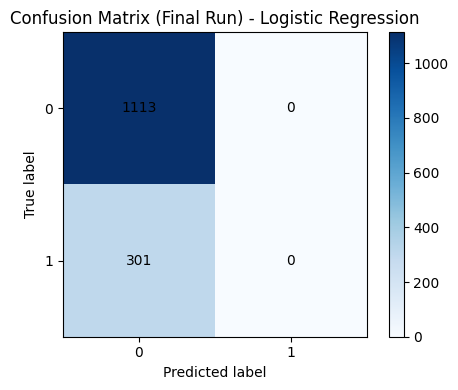

Sensitivity (Recall+): 0.0000 | Specificity: 1.0000
Precision (PPV): 0.0000 | NPV: 0.7871
FPR: 0.0000 | FNR: 1.0000 | F1: 0.0000
MCC: 0.0000 | Cohen's kappa: 0.0000 | Balanced Acc: 0.5000
Hamming loss: 0.2129 | Zero-One loss: 0.2129
Log Loss: 0.5227 | Brier score: 0.1691
Average Precision (PR-AUC): 0.2001
Random Forest Accuracy: 0.7864

=== Final-Run Metrics: Random Forest ===
Accuracy: 0.7864
Error rate (1-Acc): 0.2136
Classification Report:
              precision    recall  f1-score   support

           0     0.7870    0.9991    0.8804      1113
           1     0.0000    0.0000    0.0000       301

    accuracy                         0.7864      1414
   macro avg     0.3935    0.4996    0.4402      1414
weighted avg     0.6195    0.7864    0.6930      1414

Confusion Matrix [rows=true, cols=pred]:
[[1112    1]
 [ 301    0]]


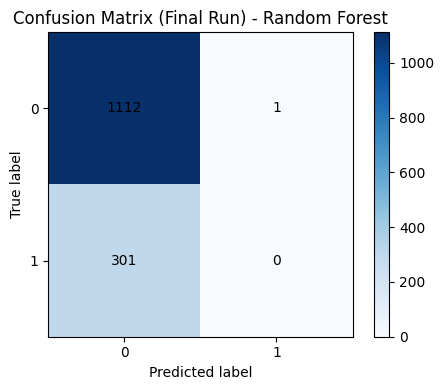

Sensitivity (Recall+): 0.0000 | Specificity: 0.9991
Precision (PPV): 0.0000 | NPV: 0.7870
FPR: 0.0009 | FNR: 1.0000 | F1: 0.0000
MCC: -0.0138 | Cohen's kappa: -0.0014 | Balanced Acc: 0.4996
Hamming loss: 0.2136 | Zero-One loss: 0.2136
Log Loss: 0.5363 | Brier score: 0.1739
Average Precision (PR-AUC): 0.1983
EBM Accuracy: 0.7871

=== Final-Run Metrics: EBM ===
Accuracy: 0.7871
Error rate (1-Acc): 0.2129
Classification Report:
              precision    recall  f1-score   support

           0     0.7871    1.0000    0.8809      1113
           1     0.0000    0.0000    0.0000       301

    accuracy                         0.7871      1414
   macro avg     0.3936    0.5000    0.4404      1414
weighted avg     0.6196    0.7871    0.6934      1414

Confusion Matrix [rows=true, cols=pred]:
[[1113    0]
 [ 301    0]]


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

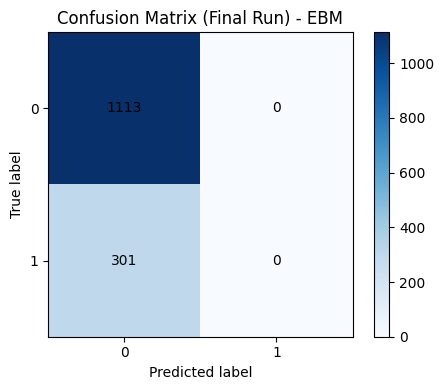

Sensitivity (Recall+): 0.0000 | Specificity: 1.0000
Precision (PPV): 0.0000 | NPV: 0.7871
FPR: 0.0000 | FNR: 1.0000 | F1: 0.0000
MCC: 0.0000 | Cohen's kappa: 0.0000 | Balanced Acc: 0.5000
Hamming loss: 0.2129 | Zero-One loss: 0.2129
Log Loss: 0.5190 | Brier score: 0.1679
Average Precision (PR-AUC): 0.2111
SVM Accuracy: 0.7871

=== Final-Run Metrics: SVM ===
Accuracy: 0.7871
Error rate (1-Acc): 0.2129
Classification Report:
              precision    recall  f1-score   support

           0     0.7871    1.0000    0.8809      1113
           1     0.0000    0.0000    0.0000       301

    accuracy                         0.7871      1414
   macro avg     0.3936    0.5000    0.4404      1414
weighted avg     0.6196    0.7871    0.6934      1414

Confusion Matrix [rows=true, cols=pred]:
[[1113    0]
 [ 301    0]]


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

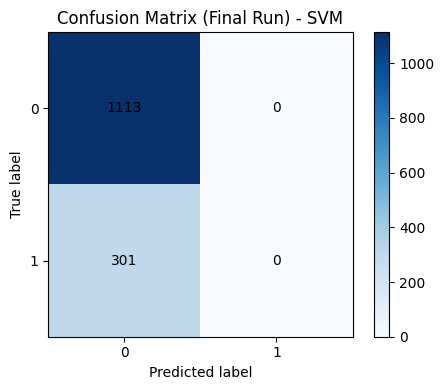

Sensitivity (Recall+): 0.0000 | Specificity: 1.0000
Precision (PPV): 0.0000 | NPV: 0.7871
FPR: 0.0000 | FNR: 1.0000 | F1: 0.0000
MCC: 0.0000 | Cohen's kappa: 0.0000 | Balanced Acc: 0.5000
Hamming loss: 0.2129 | Zero-One loss: 0.2129
Log Loss: 0.5181 | Brier score: 0.1677
Average Precision (PR-AUC): 0.2343


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:56:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7603

=== Final-Run Metrics: XGBoost ===
Accuracy: 0.7603
Error rate (1-Acc): 0.2397
Classification Report:
              precision    recall  f1-score   support

           0     0.7846    0.9587    0.8629      1113
           1     0.1481    0.0266    0.0451       301

    accuracy                         0.7603      1414
   macro avg     0.4664    0.4926    0.4540      1414
weighted avg     0.6491    0.7603    0.6888      1414

Confusion Matrix [rows=true, cols=pred]:
[[1067   46]
 [ 293    8]]


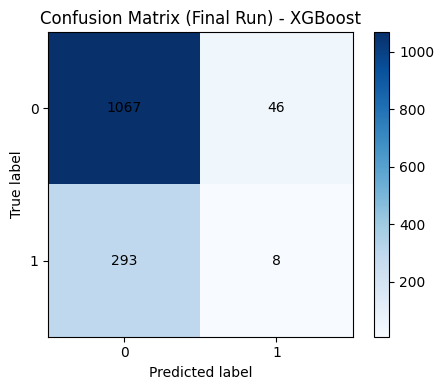

Sensitivity (Recall+): 0.0266 | Specificity: 0.9587
Precision (PPV): 0.1481 | NPV: 0.7846
FPR: 0.0413 | FNR: 0.9734 | F1: 0.0451
MCC: -0.0315 | Cohen's kappa: -0.0211 | Balanced Acc: 0.4926
Hamming loss: 0.2397 | Zero-One loss: 0.2397
Log Loss: 0.6630 | Brier score: 0.1973
Average Precision (PR-AUC): 0.1954


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step 
DNN Accuracy: 0.7765

=== Final-Run Metrics: DNN ===
Accuracy: 0.7765
Error rate (1-Acc): 0.2235
Classification Report:
              precision    recall  f1-score   support

           0     0.7877    0.9802    0.8735      1113
           1     0.2414    0.0233    0.0424       301

    accuracy                         0.7765      1414
   macro avg     0.5146    0.5017    0.4580      1414
weighted avg     0.6714    0.7765    0.6966      1414

Confusion Matrix [rows=true, cols=pred]:
[[1091   22]
 [ 294    7]]


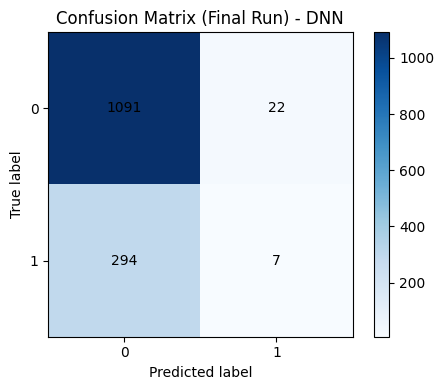

Sensitivity (Recall+): 0.0233 | Specificity: 0.9802
Precision (PPV): 0.2414 | NPV: 0.7877
FPR: 0.0198 | FNR: 0.9767 | F1: 0.0424
MCC: 0.0101 | Cohen's kappa: 0.0052 | Balanced Acc: 0.5017
Hamming loss: 0.2235 | Zero-One loss: 0.2235
Log Loss: 0.5774 | Brier score: 0.1820
Average Precision (PR-AUC): 0.2221


In [5]:
for i in range(n_runs):
    print(f"\n--- Run {i+1}/{n_runs} ---")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Logistic Regression
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_prob = lr.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    results["Logistic Regression"].append(acc)
    print(f"Logistic Regression Accuracy: {acc:.4f}")
    if i == n_runs - 1:  
        log_final_run_metrics("Logistic Regression", y_test, y_pred, y_prob, roc_data)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=i)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    results["Random Forest"].append(acc)
    print(f"Random Forest Accuracy: {acc:.4f}")
    if i == n_runs - 1:  
        log_final_run_metrics("Random Forest", y_test, y_pred, y_prob, roc_data)

    # Explainable Boosting
    ebm = ExplainableBoostingClassifier(random_state=i)
    ebm.fit(X_train, y_train)
    y_pred = ebm.predict(X_test)
    y_prob = ebm.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    results["EBM"].append(acc)
    print(f"EBM Accuracy: {acc:.4f}")
    if i == n_runs - 1:  
        log_final_run_metrics("EBM", y_test, y_pred, y_prob, roc_data)

    # SVM
    svm = SVC(kernel='rbf', probability=True, random_state=i)  
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    results["SVM"].append(acc)
    print(f"SVM Accuracy: {acc:.4f}")
    if i == n_runs - 1:  
        log_final_run_metrics("SVM", y_test, y_pred, y_prob, roc_data)

    # XGBoost
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=i)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    y_prob = xgb.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    results["XGBoost"].append(acc)
    print(f"XGBoost Accuracy: {acc:.4f}")
    if i == n_runs - 1:  
        log_final_run_metrics("XGBoost", y_test, y_pred, y_prob, roc_data)

    # DNN
    dnn = Sequential()
    dnn.add(Dense(128, input_dim=X.shape[1], activation='relu'))
    dnn.add(BatchNormalization())
    dnn.add(Dropout(0.3))
    dnn.add(Dense(64, activation='relu'))
    dnn.add(Dense(1, activation='sigmoid'))

    dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    dnn.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    y_prob = dnn.predict(X_test).flatten()
    y_pred = (y_prob > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    results["DNN"].append(acc)
    print(f"DNN Accuracy: {acc:.4f}")
    if i == n_runs - 1:  
        log_final_run_metrics("DNN", y_test, y_pred, y_prob, roc_data)

In [6]:
print("\n=== Accuracy Per Run ===")
for model, accs in results.items():
    print(f"{model}: {['{:.4f}'.format(a) for a in accs]}")


=== Accuracy Per Run ===
Logistic Regression: ['0.7900', '0.7921', '0.7956', '0.7999', '0.7871']
Random Forest: ['0.7900', '0.7921', '0.7956', '0.7999', '0.7864']
EBM: ['0.7900', '0.7921', '0.7956', '0.7999', '0.7871']
SVM: ['0.7900', '0.7921', '0.7956', '0.7999', '0.7871']
XGBoost: ['0.7730', '0.7709', '0.7744', '0.7751', '0.7603']
DNN: ['0.7673', '0.7652', '0.7744', '0.7815', '0.7765']


In [7]:
summary = {
    model: {
        "Mean Accuracy": np.mean(accs),
        "Std Dev": np.std(accs)
    }
    for model, accs in results.items()
}

In [8]:
df_results = pd.DataFrame(summary).T.sort_values(by="Mean Accuracy", ascending=False)
print("\n=== Summary of Results ===")
print(df_results)


=== Summary of Results ===
                     Mean Accuracy   Std Dev
Logistic Regression       0.792928  0.004437
EBM                       0.792928  0.004437
SVM                       0.792928  0.004437
Random Forest             0.792786  0.004627
DNN                       0.772984  0.005984
XGBoost                   0.770721  0.005430


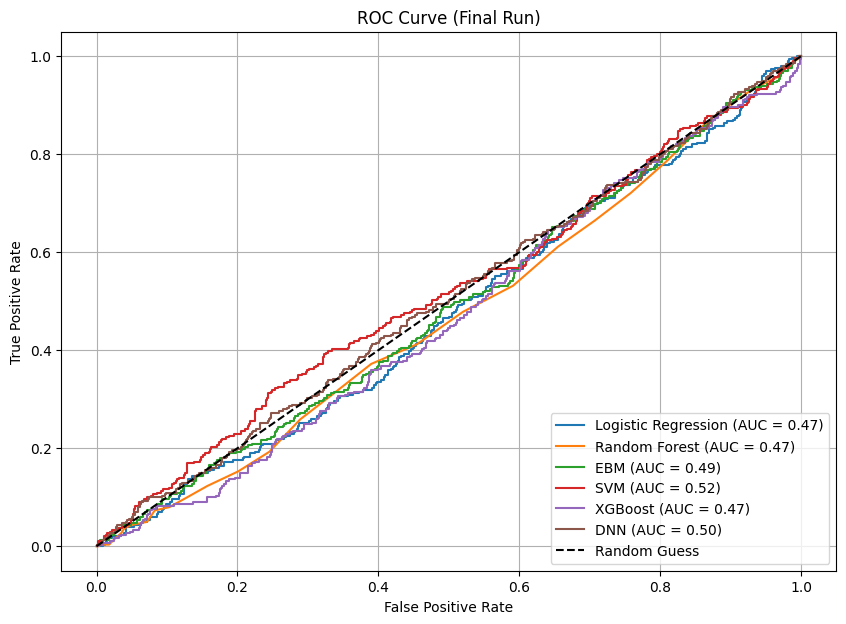

In [9]:
plt.figure(figsize=(10, 7))
for model, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{model} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve (Final Run)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()